# Importando Bibliotecas

In [1]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Nível Básico

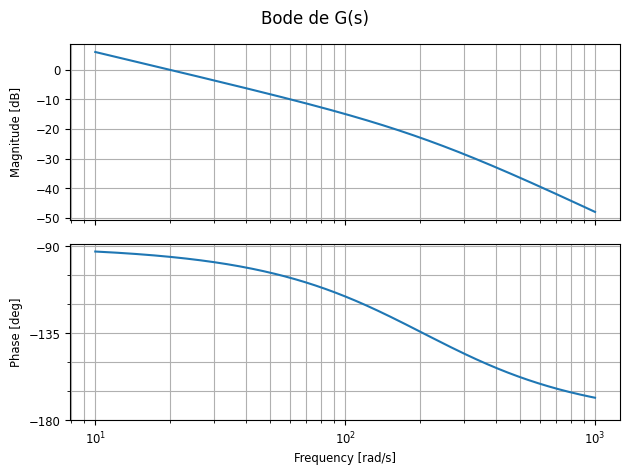

In [2]:
num = [19.92]
den = [4.88e-3, 1, 0]
G = ctl.tf(num, den)

ctl.bode(G, dB=True)
plt.suptitle("Bode de G(s)")
plt.show()


# Nível Intermediário

G(s) = (19.92) / (0.00488s^2 + s)



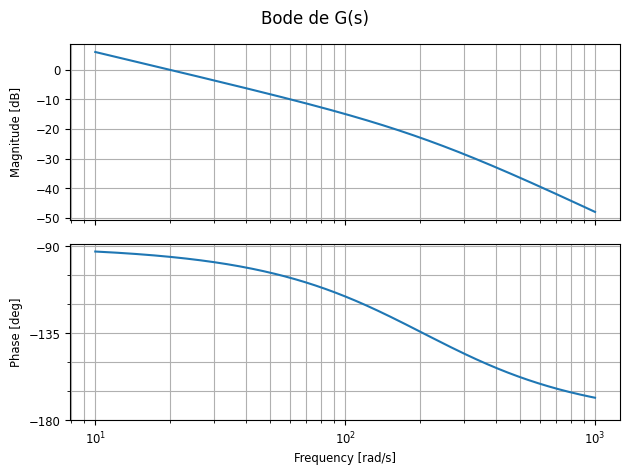

In [ ]:
def exibe_funcao_trasnferencia(G):
    """
    Exibe G(s) no formato: G(s) = (num) / (a s^n + ... + c)
    omitindo termos de coeficiente zero e simplificando coef=1.
    """
    num = G.num[0][0]
    den = G.den[0][0]

    # numerador
    num_str = " + ".join(f"{coef:g}" for coef in num)
    num_fmt = f"({num_str})"

    # denominador
    order = len(den) - 1
    terms = []
    for i, coef in enumerate(den):
        p = order - i
        if np.isclose(coef, 0):
            continue
        if p == 1:
            terms.append("s" if np.isclose(coef, 1) else f"{coef:g}s")
        elif p > 1:
            terms.append(f"s^{p}" if np.isclose(coef, 1) else f"{coef:g}s^{p}")
        else:
            terms.append(f"{coef:g}")
    den_str = " + ".join(terms)

    print(f"G(s) = {num_fmt} / ({den_str})\n")


if __name__ == "__main__":

    num = [19.92]
    den = [4.88e-3, 1, 0]
    G = ctl.tf(num, den)

    exibe_funcao_trasnferencia(G)

    # Exibindo Curvas de Bode (Exatas)
    ctl.bode(G, dB=True)
    plt.suptitle("Bode de G(s)")
    plt.show()

# Explicação detalhada do método intermediário

In [ ]:

def exibe_funcao_trasnferencia(G):
    """
    O objetivo desta função é exibir a função de transferência G(s) de uma forma legível,
    como: G(s) = (numerador) / (denominador).
    A função também omite termos com coeficiente zero e simplifica quando o coeficiente é 1.
    """

    """
    -> G é um objeto da biblioteca 'control'. G.num e G.den guardam os coeficientes
    do numerador e do denominador. Eles vêm dentro de listas aninhadas,
    por isso usamos [0][0] para pegar a lista de coeficientes que nos interessa.
    """
    num = G.num[0][0]
    den = G.den[0][0]
    
    """
    ~> Processamento do Numerador:
        - A linha abaixo formata o numerador. Para cada coeficiente 'coef' na lista 'num',
        ele o transforma em uma string. O ':g' formata o número de forma geral (evita zeros desnecessários).

        - O " + ".join() junta todas essas strings, separando-as com " + ".
    """

    num_str = " + ".join(f"{coef:g}" for coef in num)
    """
    Coloca o resultado final entre parênteses.
    """
    num_fmt = f"({num_str})"

    """
    ~> Processamento do Denominador:
        - A ordem do polinômio do denominador é o número de coeficientes menos 1.
    """
    ordem = len(den) - 1
    """
    Cria uma lista vazia para guardar as partes do denominador (ex: "4.88e-3s^2", "s").
    """
    termos = []
    
    """
    O 'enumerate' nos permite percorrer a lista 'den' obtendo tanto o índice (i)
    quanto o valor (coef) de cada elemento.
    """
    for i, coef in enumerate(den):
        """
        Calcula a potência 'p' de 's' para o termo atual.
        """
        p = ordem - i
        """
        Se o coeficiente for muito próximo de zero, o ignoramos e pulamos para o próximo.
        Usamos np.isclose em vez de '==' para evitar problemas com a precisão de números de ponto flutuante.
        """
        if np.isclose(coef, 0):
            """
            O comando 'continue' pula o resto do código dentro do 'for' e vai para a próxima iteração.
            """
            continue

        """
        Agora, montamos a string para cada termo dependendo da potência de 's'.
        """
        if p == 1: # Se a potência for 1 (termo com 's')
            # Se o coeficiente for 1, adiciona apenas "s". Senão, adiciona "coef*s".
            term_str = "s" if np.isclose(coef, 1) else f"{coef:g}s"
            termos.append(term_str)

        elif p > 1: # Se a potência for maior que 1 (ex: s^2, s^3)
            # Se o coeficiente for 1, adiciona apenas "s^p". Senão, adiciona "coef*s^p".
            term_str = f"s^{p}" if np.isclose(coef, 1) else f"{coef:g}s^{p}"
            termos.append(term_str)
        else: # Se a potência for 0 (termo constante, sem 's')
            # Adiciona apenas o coeficiente.
            termos.append(f"{coef:g}")

    """       
    Junta todos os termos do denominador que foram adicionados à lista 'termos'.
    """
    den_str = " + ".join(termos)

    print(f"G(s) = {num_fmt} / ({den_str})\n")

"""
~> Este é um bloco de código especial em Python:
    - O código dentro dele SÓ SERÁ EXECUTADO se este arquivo for rodado diretamente
      se este arquivo for importado por outro script, o código abaixo não roda.
"""
if __name__ == "__main__":

    num = [19.92]
    den = [4.88e-3, 1, 0]
    G = ctl.tf(num, den)

    exibe_funcao_trasnferencia(G)

    ctl.bode(G, dB=True)
    plt.suptitle("Bode de G(s)")
    plt.show()